In [1]:
import qt
from qt import dt, np, pd

import seaborn as sns
import matplotlib.pyplot as plt

- loading datasets

In [2]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
ss = pd.read_csv('data/sample_submission.csv')

In [3]:
test.shape
train.shape
ss.shape

(11383, 18)

(45528, 19)

(5, 2)

In [4]:
train.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,"45,528.00","44,754.00","45,528.00","45,065.00","45,445.00","45,441.00","45,433.00","45,528.00","45,528.00","45,520.00","45,528.00","45,528.00","45,528.00"
mean,38.99,0.42,"200,655.62","67,609.29",2.16,0.18,"31,796.97","43,548.42",52.24,782.79,0.06,0.05,0.08
std,9.54,0.72,"669,074.03","139,323.52",0.91,0.38,"17,269.73","148,784.69",29.38,100.62,0.26,0.22,0.27
min,23.00,0.00,"27,170.61",2.00,1.00,0.00,"2,237.47","4,003.14",0.00,500.00,0.00,0.00,0.00
25%,31.00,0.00,"126,345.84",936.00,2.00,0.00,"19,231.14","23,973.81",27.00,704.00,0.00,0.00,0.00
50%,39.00,0.00,"171,714.91","2,224.00",2.00,0.00,"29,081.65","35,688.04",54.00,786.00,0.00,0.00,0.00
75%,47.00,1.00,"240,603.76","5,817.00",3.00,0.00,"40,561.15","53,435.76",78.00,867.00,0.00,0.00,0.00
max,55.00,9.00,"140,759,012.73","365,252.00",10.00,1.00,"328,112.86","31,129,970.49",99.00,949.00,2.00,1.00,1.00


In [5]:
train.shape
train.dropna().shape

(45528, 19)

(43509, 19)

In [6]:
train.isna().sum(axis=0)

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

#### different kind of features exploration
- categorical, ordinal and numerical

In [7]:
cat_features = ['gender', 'owns_car', 'owns_house', 'occupation_type', 'migrant_worker']
cat_num_features = ['no_of_children', 'total_family_members', 'prev_defaults', 'default_in_last_6months']
num_features = ['age', 'net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)', 'credit_score']
target = 'credit_card_default'
ign_features = [x for x in train.columns if not x in (cat_features + cat_num_features + num_features + [target])] # customer_id, name

In [8]:
train['sqrt_credit_limit'] = np.log(1+train['credit_limit'])
train['sqrt_net_yearly_income'] = np.log(1+train['net_yearly_income'])
train['sqrt_yearly_debt_payments'] = np.log(1+train['yearly_debt_payments'])

num_features += ['sqrt_credit_limit', 'sqrt_net_yearly_income', 'sqrt_yearly_debt_payments',]

#### categorical features
- pd.DataFrame(train.value_counts(['gender', 'credit_card_default'])).reset_index() .plot.hist(x='gender', y='count', color='credit_card_default', barmode='group')

[JUSTY.LOG]	2026-01-21 20:53:48,704 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[JUSTY.LOG]	2026-01-21 20:53:48,717 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


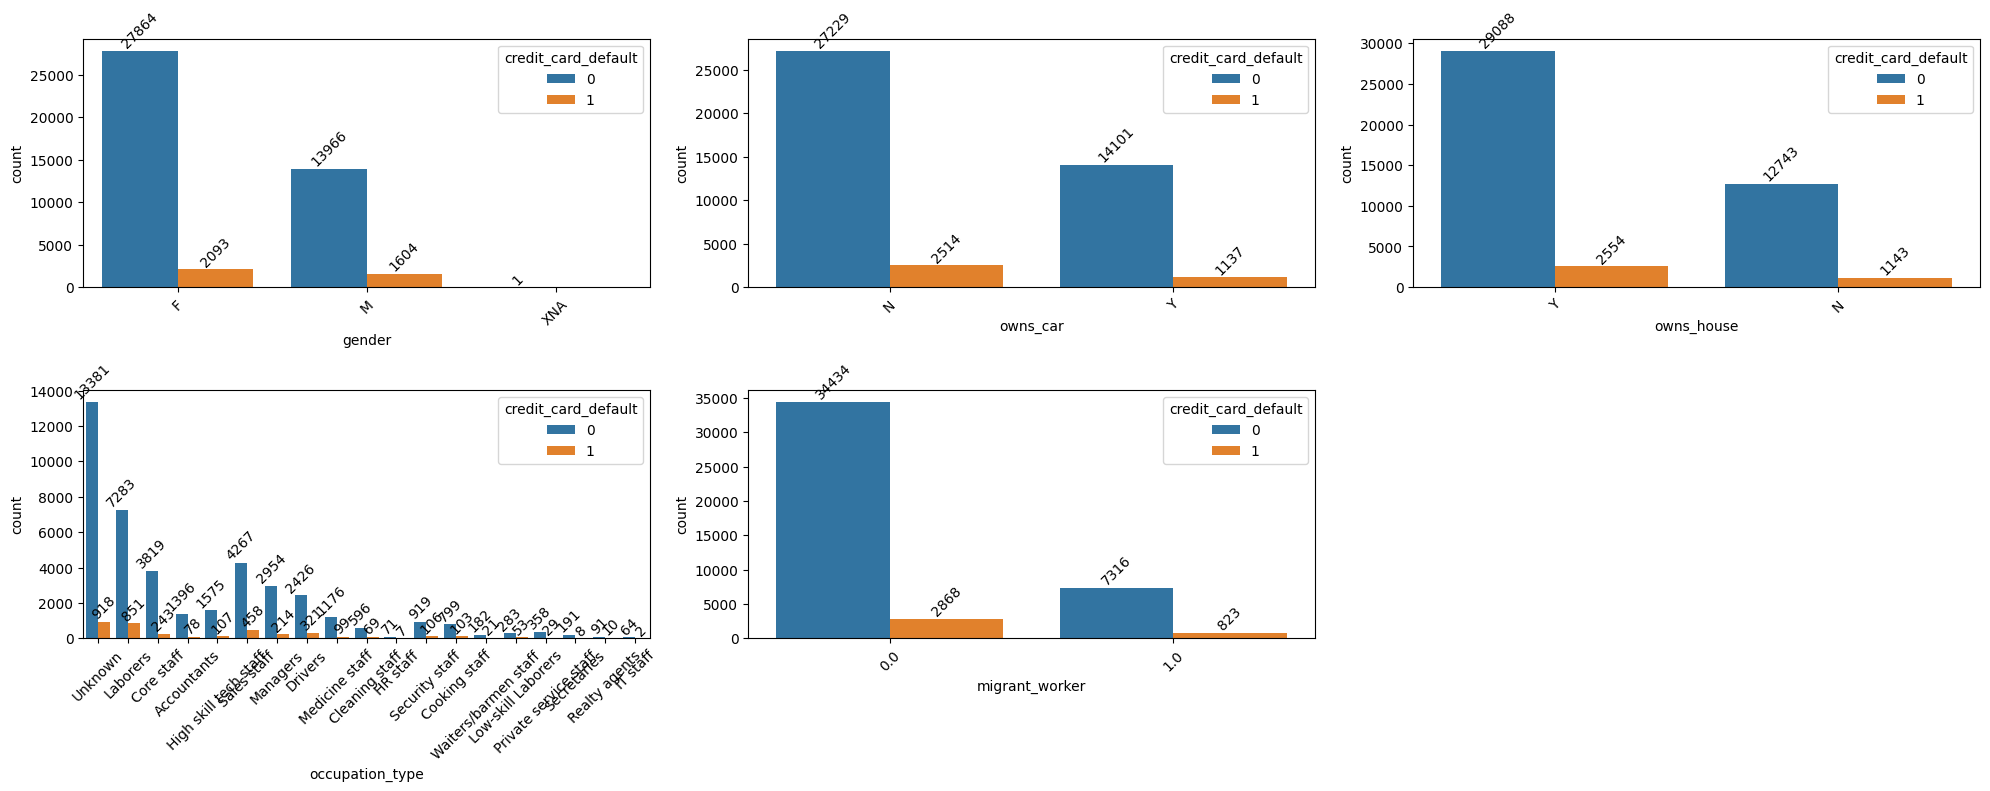

In [9]:
# plt.figure(figsize=(10,8))
fig, axs = plt.subplots(2,3, figsize=(20,8))
axs_flat = axs.flatten()
for idx in range(len(cat_features)):
	ax_ = axs_flat[idx]
	col = cat_features[idx]
	_ = sns.countplot(train, x=col, hue=target, ax=ax_, )
	# _ = ax_.set_xticklabels(ax_.get_xticklabels(), rotation=45, ha='right')
	_ = ax_.tick_params(axis='x', labelrotation=45)

	for container in ax_.containers:
		_ = ax_.bar_label(container, rotation=45)

# hide unused plots
for ax in axs_flat[len(cat_features):]:
	ax.set_visible(False)

plt.tight_layout()
plt.show()

- categorical numerical features

[JUSTY.LOG]	2026-01-21 20:53:50,313 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[JUSTY.LOG]	2026-01-21 20:53:50,326 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[JUSTY.LOG]	2026-01-21 20:53:50,385 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[JUSTY.LOG]	2026-01-21 20:53:50,401 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate

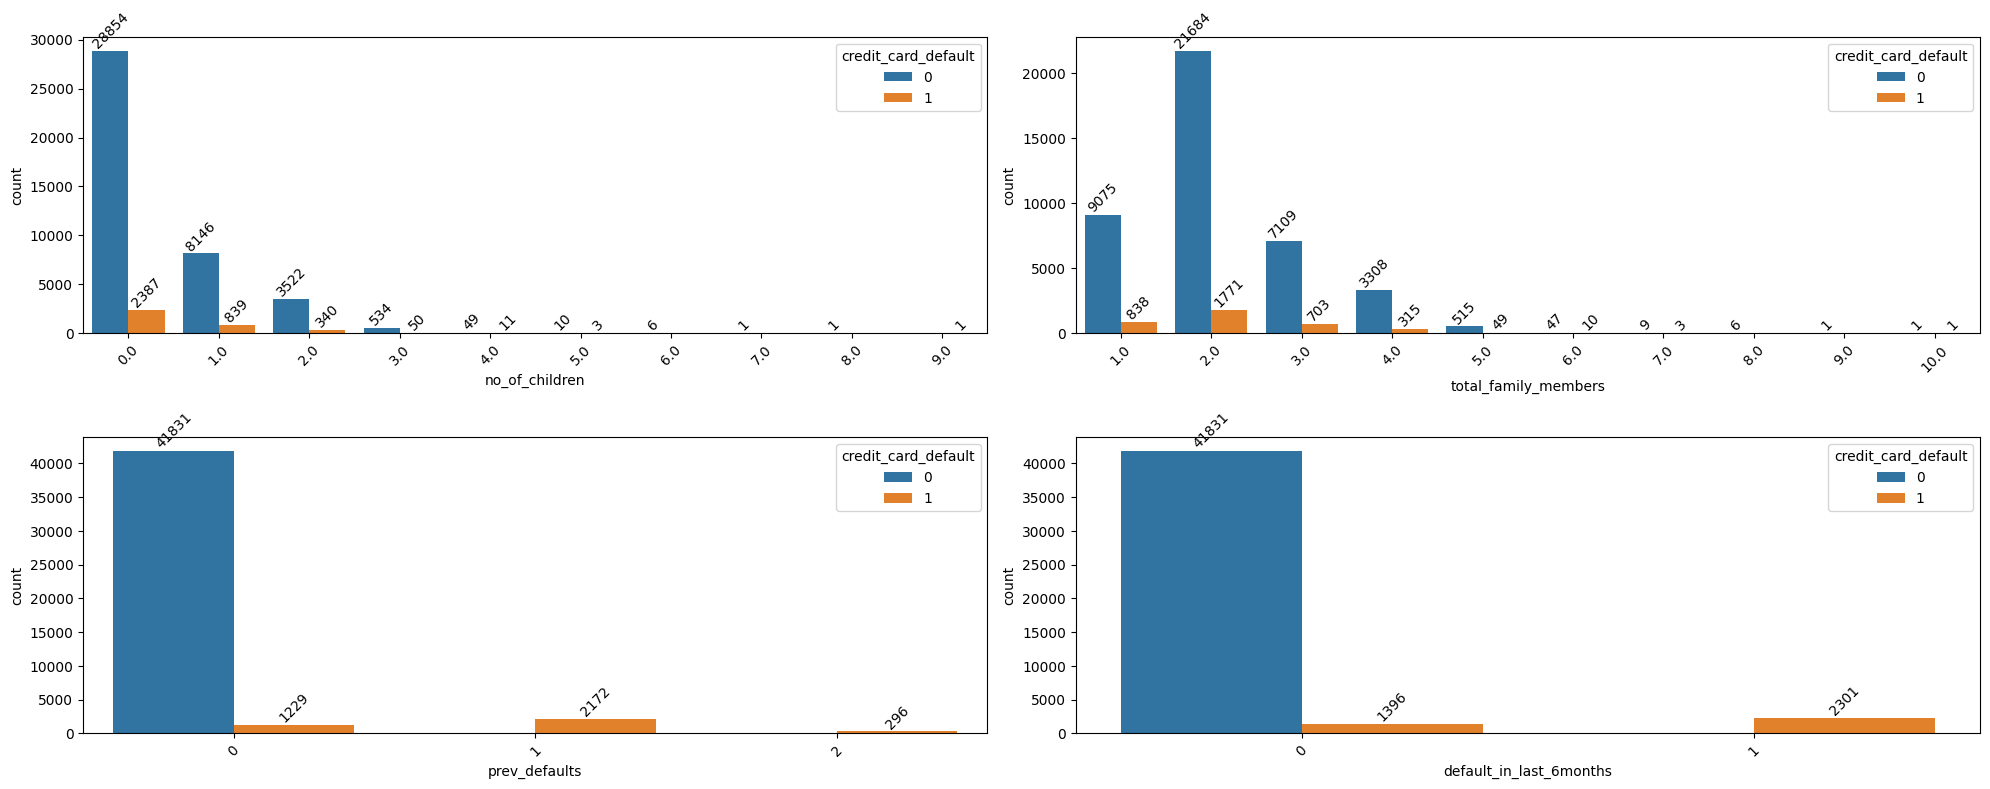

In [10]:
# plt.figure(figsize=(10,8))
fig, axs = plt.subplots(2,2, figsize=(20,8))
axs_flat = axs.flatten()
for idx in range(len(cat_num_features)):
	ax_ = axs_flat[idx]
	col = cat_num_features[idx]
	_ = sns.countplot(train, x=col, hue=target, ax=ax_, )
	# _ = ax_.set_xticklabels(ax_.get_xticklabels(), rotation=45, ha='right')
	_ = ax_.tick_params(axis='x', labelrotation=45)

	for container in ax_.containers:
		_ = ax_.bar_label(container, rotation=45)

# hide unused plots
for ax in axs_flat[len(cat_num_features):]:
	ax.set_visible(False)

plt.tight_layout()
plt.show()

In [11]:
train.value_counts(['prev_defaults', target])

prev_defaults  credit_card_default
0              0                      41831
1              1                       2172
0              1                       1229
2              1                        296
Name: count, dtype: int64

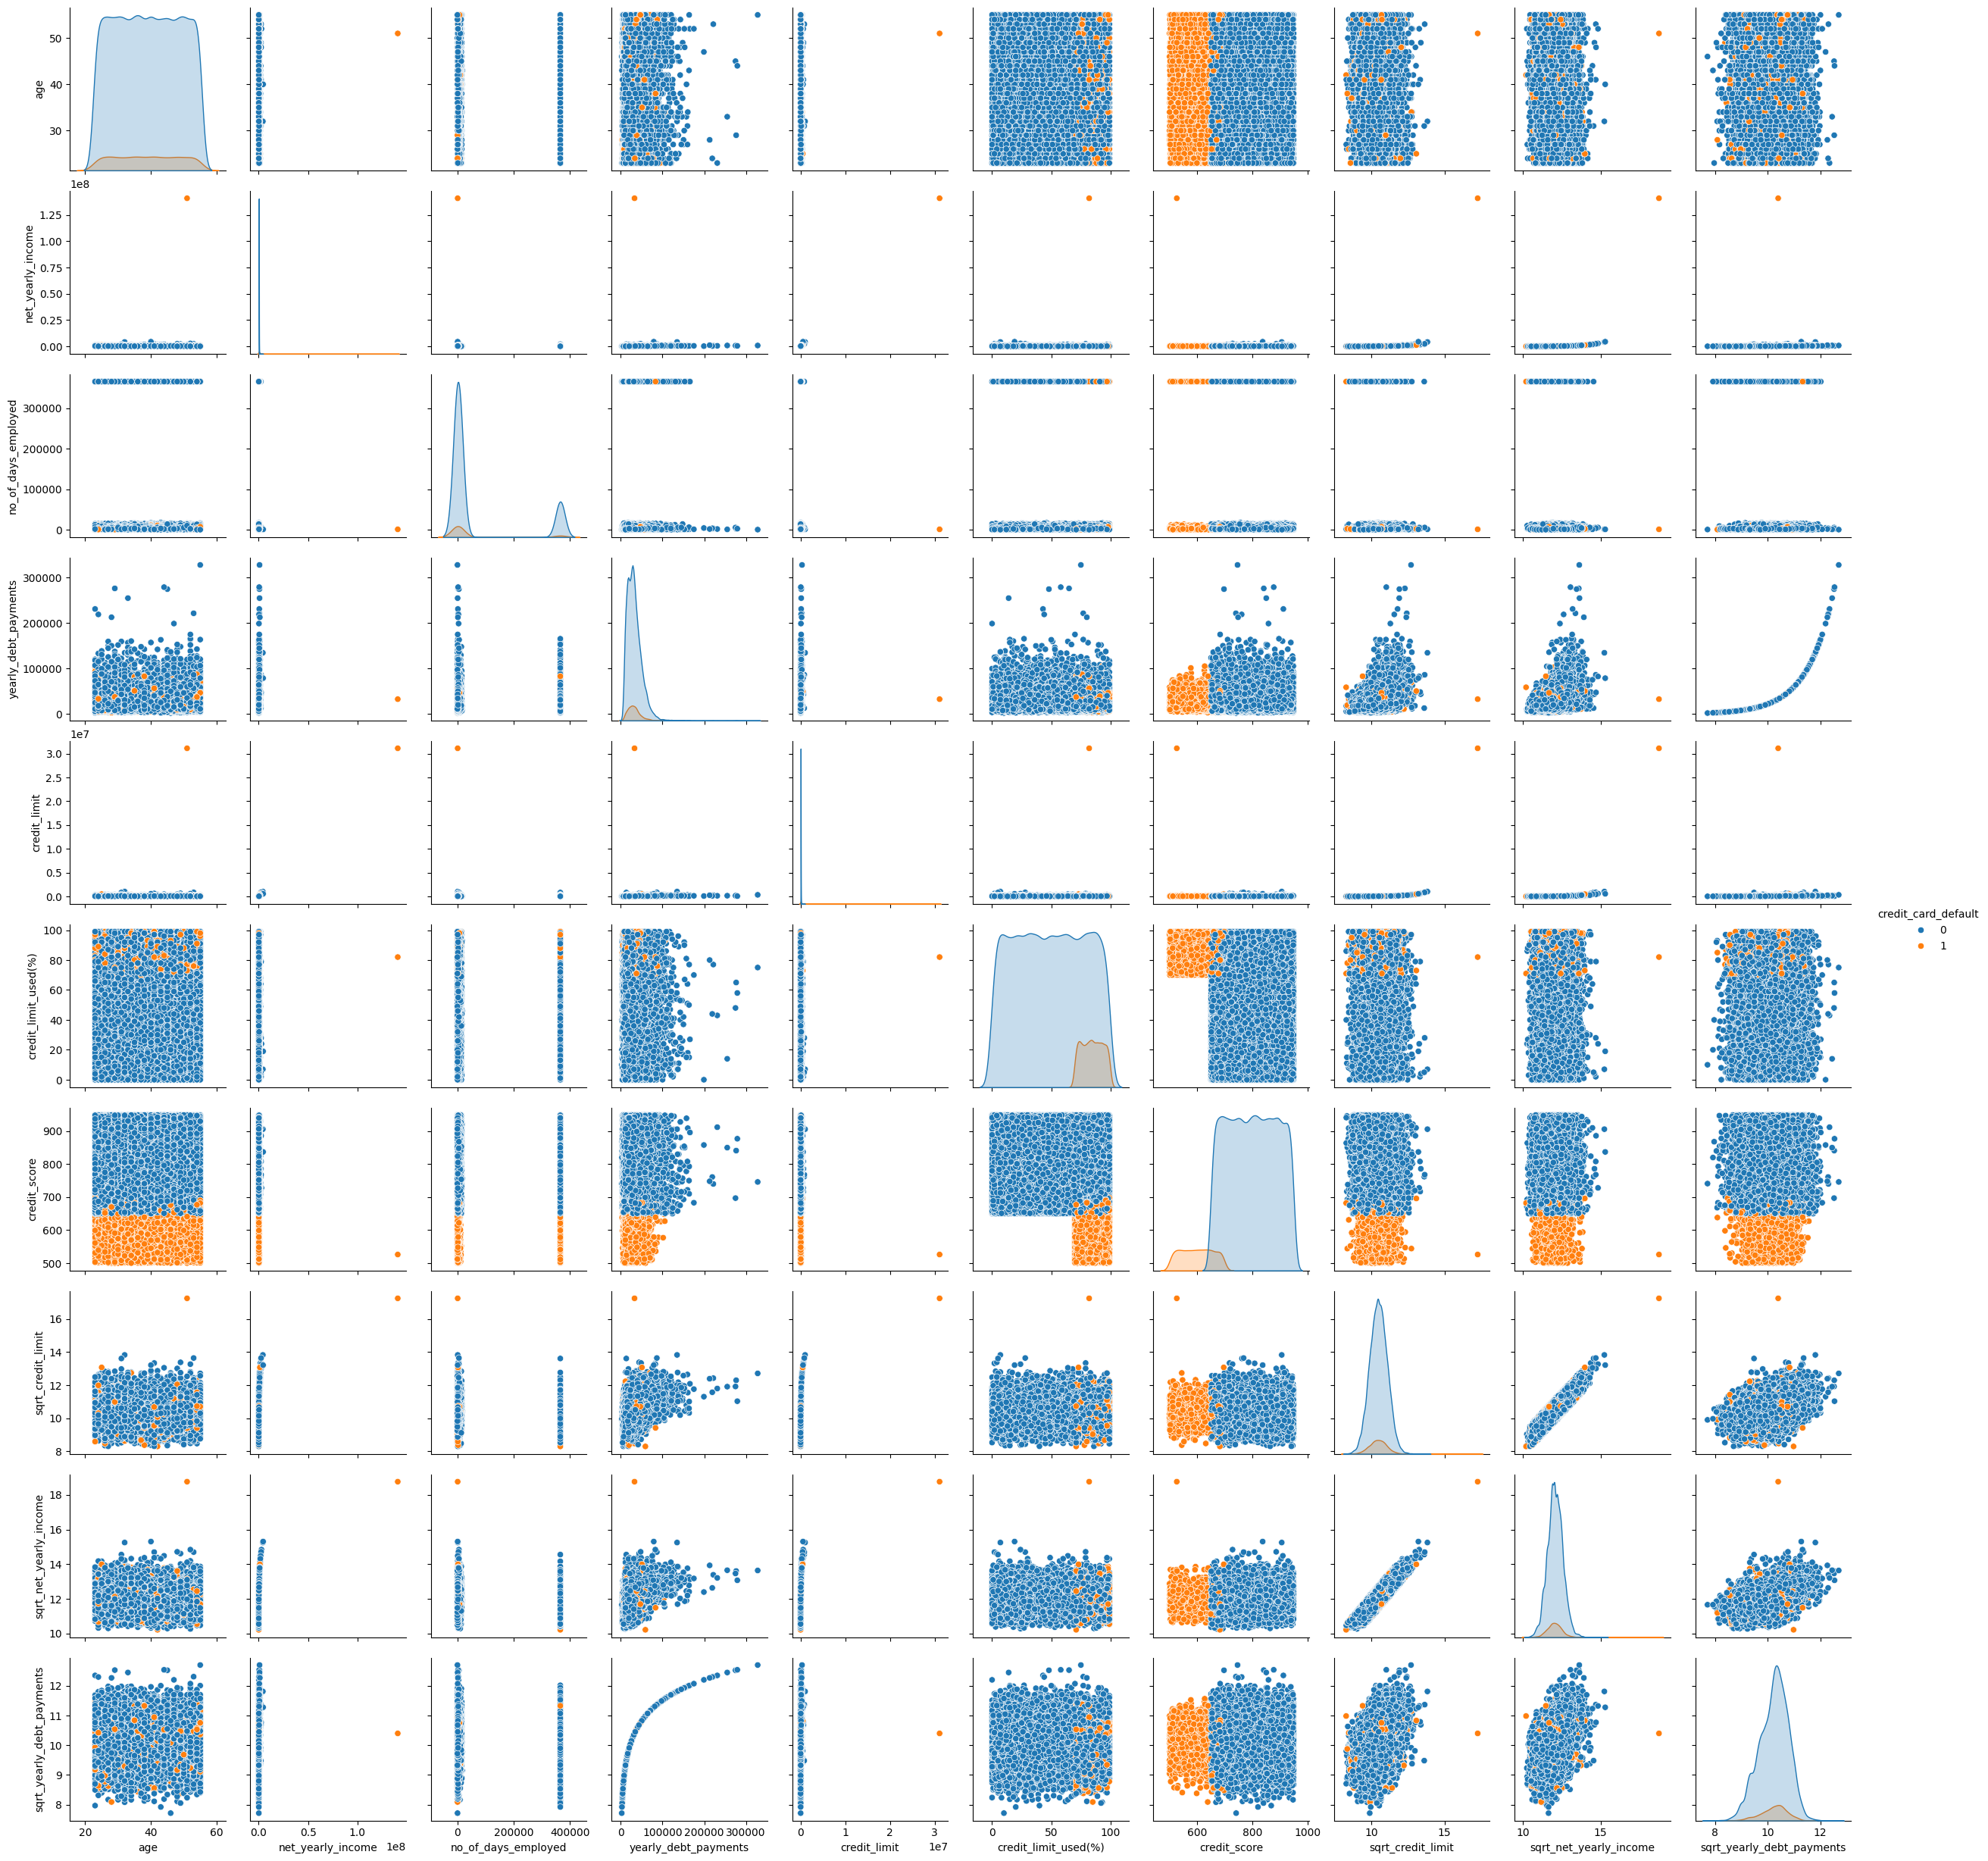

In [12]:
# plt.figure(figsize=(10, 10))
sns.pairplot(train[num_features + [target]], hue=target)
# plt.tight_layout()
# plt.show()

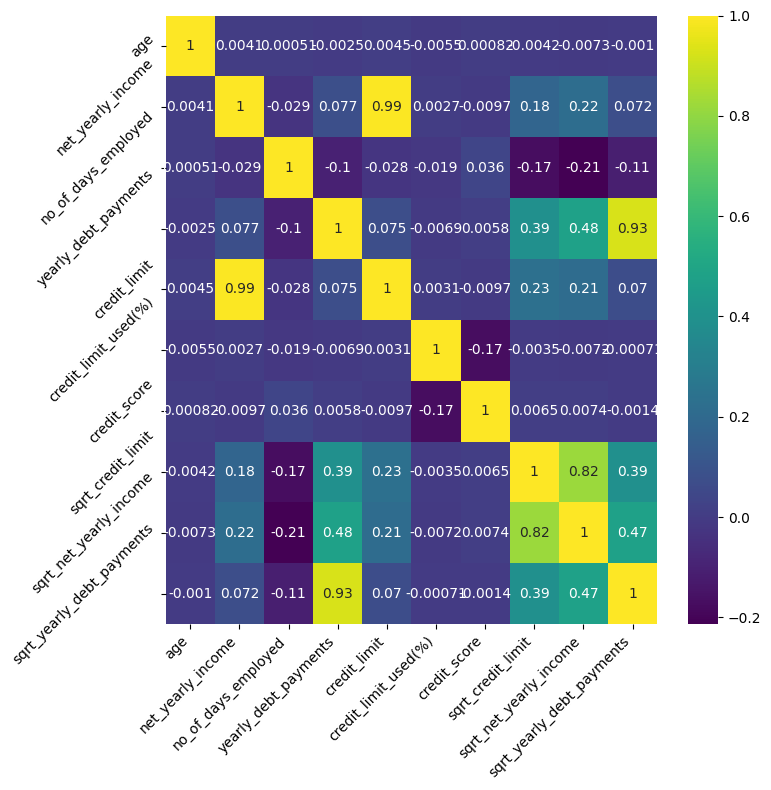

In [13]:
_ = plt.figure(figsize=(8,8))
_ = sns.heatmap(train[num_features] .corr(), annot=True, cmap="viridis")
_ = plt.xticks(rotation=45, ha="right")
_ = plt.yticks(rotation=45)
_ = plt.tight_layout()
_ = plt.show()

- feature engineering

In [14]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

In [15]:
import joblib
import pickle
from pathlib import Path

def transform_features(df):

	cat_features = ['gender', 'owns_car', 'owns_house', 'occupation_type', 'migrant_worker']
	cat_num_features = ['no_of_children', 'total_family_members', 'prev_defaults', 'default_in_last_6months']
	num_features = ['age', 'net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)', 'credit_score']
	target = 'credit_card_default'

	# add sqrt features for net_yearly_income, yearly_debt_payments, credit_limit
	# make a copy
	train2 = df.copy()
	train2 = train2.dropna()

	# categorical encoding
	if not Path('oec.pkl').is_file():
		oec = OrdinalEncoder()
		oec.fit(train2[cat_features])

		# save encoder
		qt.log.info(f"saving encoder for training data")
		with open("oec.pkl", "wb") as f:
			pickle.dump(oec, f)
	else:
		qt.log.info(f"reading encoder for test data")
		with open("oec.pkl", "rb") as f:
			oec = pickle.load(f)

	# transform features
	train2[cat_features] = oec.transform(train2[cat_features])

	train2['sqrt_credit_limit']			= np.log(1+train2['credit_limit'])
	train2['sqrt_net_yearly_income']	= np.log(1+train2['net_yearly_income'])
	train2['sqrt_yearly_debt_payments'] = np.log(1+train2['yearly_debt_payments'])

	# pd.DataFrame(cat_features, oec.categories_)
	# qt.view2(pd.DataFrame({'feature' : cat_features, 'values' : oec.categories_}))

	# drop customer_id and name
	train2 = train2.drop(columns=['customer_id', 'name'])

	# drop column no_of_days_employed -> this has weird numbers in 20% of rows
	train2 = train2.drop(columns=['no_of_days_employed'])

	# t = train2[['age', 'no_of_days_employed', target]].reset_index(drop=True)
	# t['days_lived'] = t['age']*365
	# t['pctg_life_employed'] = t['no_of_days_employed']/t['days_lived']
	# t.loc[t['pctg_life_employed'] > 1, 'pctg_life_employed'] = np.nan

	# t[t['pctg_life_employed'] < 1].plot.hist(x='pctg_life_employed', color=target)
	# t[t['pctg_life_employed'] >=1].plot.hist(x='pctg_life_employed', color=target)

	# drop income and payments column -> use sqrt one
	train2 = train2.drop(columns=['net_yearly_income', 'yearly_debt_payments', 'credit_limit'])

	return train2

- creating training and test datasets

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
train_cleaned = transform_features(train)
# y_train = X_train[target]
# X_train = X_train.drop(columns=[target])

# X_test = transform_features(test)

# X_train.shape
# y_train.shape
# X_test.shape
X = train_cleaned.drop(columns=[target])
y = train_cleaned[target]

X.shape
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=31, train_size=0.8)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

[JUSTY.LOG]	2026-01-21 20:56:12,439 - qt.common.help - INFO - reading encoder for test data


(43509, 15)

(43509,)

(34807, 15)

(8702, 15)

(34807,)

(8702,)

- model fitting

In [36]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
def train_model_gs_cv(model, param_grid, cv, X_train, y_train, X_test, y_test):
	grid = GridSearchCV(model, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
	grid.fit(X_train, y_train)

	best_model = grid.best_estimator_
	y_pred = best_model.predict(X_test)

	acc = accuracy_score(y_test, y_pred)
	cm = confusion_matrix(y_test, y_pred)

	return best_model, grid.best_params_, acc, cm

In [42]:
# stratify in creating k folds as well
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [48]:
# logistic regression
lr_model = LogisticRegression(
	class_weight="balanced", solver="liblinear", max_iter=1000
)
lr_params_grid = {
	"C" : [0.01, 0.05, 0.1, 0.5, 1],
	"penalty" : ["l2"]
}

# decision tree
dt_model = DecisionTreeClassifier(random_state=1, class_weight = "balanced")
dt_params_grid = {
	"max_depth" : [3,5,7,10, None],
	"min_samples_split" : [2,5,10],
	"min_samples_leaf" : [1,2,4]
}

# random forest
rf_model = RandomForestClassifier(random_state=1, class_weight="balanced", n_jobs=-1)
rf_params_grid = {
	"n_estimators" : [100, 200],
	"max_depth" : [5,7,10, None],
	"min_samples_split" : [2,5,10],
	"min_samples_leaf" : [1,2,4]
}


In [49]:
best_lr_model, lr_params, lr_acc, lr_cm = train_model_gs_cv(lr_model, lr_params_grid, cv, X_train, y_train, X_test, y_test)
best_dt_model, dt_params, dt_acc, dt_cm = train_model_gs_cv(dt_model, dt_params_grid, cv, X_train, y_train, X_test, y_test)
best_rf_model, rf_params, rf_acc, rf_cm = train_model_gs_cv(rf_model, rf_params_grid, cv, X_train, y_train, X_test, y_test)

/home/justy/venvs/jenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/justy/venvs/jenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/justy/venvs/jenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid thi

In [50]:
print(f"Logistic Regression model accuracy = {lr_acc}")
print(f"Decision Tree model accuracy = {dt_acc}")
print(f"Random Forest model accuracy = {rf_acc}")

Logistic Regression model accuracy = 0.9456446793840496
Decision Tree model accuracy = 0.9721903010802114
Random Forest model accuracy = 0.9809239255343599


In [51]:
print(f"Logistic Regression model confusion_matrix : \n{lr_cm}")
print(f"Decision Tree model confusion_matrix : \n{dt_cm}")
print(f"Random Forest model confusion_matrix : \n{rf_cm}")

Logistic Regression model confusion_matrix : 
[[7556  440]
 [  33  673]]
Decision Tree model confusion_matrix : 
[[7877  119]
 [ 123  583]]
Random Forest model confusion_matrix : 
[[7988    8]
 [ 158  548]]
